In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join

In [2]:
import dask
import dask.dataframe as dd
from dask.distributed import Client
from dask.diagnostics import ProgressBar

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

In [4]:
path = '../dataset'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

In [5]:
onlyfiles

['batt_acdc_events.csv000.gz',
 'frgnd_backgrnd_apps.csv000.gz',
 'batt_info.csv000.gz',
 'frgnd_v2.csv000.gz',
 'devuse_4known_device.csv000.gz',
 'system_sysinfo_unique_normalized.csv000.gz',
 'devuse_4known_device.csv001.gz',
 'hw_metric_histo.csv000.gz',
 'mousewait_all.csv001.gz',
 'hw_metric_histo.csv001.gz',
 'plist_process_resource_util_hist.csv001.gz',
 'plist_process_resource_util_13wks.csv000.gz',
 'mousewait.csv000.gz',
 'plist_process_resource_util_13wks.csv001.gz',
 'plist_process_resource_util_hist.csv002.gz',
 'plist_process_resource_util_hist.csv003.gz']

In [6]:
c = Client()
c

Client Scheduler: tcp://127.0.0.1:41632 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 34.36 GB


## Mousewait
- missing data from the dictionary

In [7]:
def dataframe(filename, delimiter = None):
    return dd.read_csv(filename, sep=delimiter, compression='gzip', error_bad_lines=False)

In [8]:
def dataframe2(filename, delimiter = None):
    return pd.read_csv(filename, sep=delimiter, nrows = 3000000, compression='gzip', error_bad_lines=False)

In [9]:
mousewait = dataframe2('../dataset/mousewait_all.csv001.gz', '\x01')
mousewait.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,after_cpuutil_max,after_harddpf_mean,after_harddpf_min,after_harddpf_max,after_diskutil_mean,after_diskutil_min,after_diskutil_max,after_networkutil_mean,after_networkutil_min,after_networkutil_max
0,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:06:07,...,63.653845,32975.522486,14414.729578,109379.546298,6.996697e+06,4.424675e+06,1.669766e+07,160113.666050,10555.214421,7.005273e+05
1,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:36:14,...,52.734400,23418.144640,1118.973930,78629.416961,1.603042e+06,1.966386e+04,8.046177e+06,10087.796235,2286.012122,1.363990e+04
2,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:17:33,...,58.965876,23912.363263,1737.067429,116903.898039,2.141939e+06,3.277305e+04,9.064737e+06,12314.223147,8185.584133,2.340836e+04
3,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:53:26,...,34.951303,21957.671636,530.575343,113020.664224,1.552810e+06,3.153773e+04,6.460560e+06,8264.801956,2176.351066,1.344384e+04
4,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 21:02:01,...,64.355809,46216.966367,22111.284672,110219.798541,6.959890e+06,2.837489e+06,1.672723e+07,474115.187358,22557.075868,2.653365e+06


In [71]:
mousewait.shape

(3000000, 36)

In [11]:
# Checking the missing values
mousewait.isnull().any()

load_ts                    False
batch_id                   False
audit_zip                  False
audit_internal_path        False
guid                       False
interval_start_utc         False
interval_end_utc           False
interval_local_start       False
interval_local_end         False
ts                         False
dt                         False
wait_msecs                 False
before_cpuutil_mean        False
before_cpuutil_min         False
before_cpuutil_max         False
before_harddpf_mean        False
before_harddpf_min         False
before_harddpf_max         False
before_diskutil_mean       False
before_diskutil_min        False
before_diskutil_max        False
before_networkutil_mean    False
before_networkutil_min     False
before_networkutil_max     False
after_cpuutil_mean         False
after_cpuutil_min          False
after_cpuutil_max          False
after_harddpf_mean         False
after_harddpf_min          False
after_harddpf_max          False
after_disk

Text(0.5, 1.0, 'Guid Count in mousewait_all')

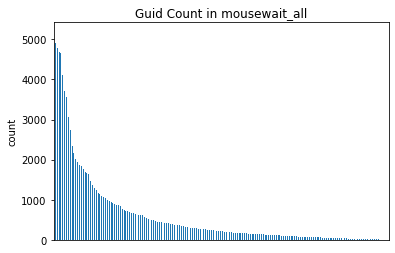

In [22]:
guid = mousewait.guid.value_counts().plot(kind = 'bar')
guid.axes.get_xaxis().set_visible(False)
plt.ylabel("count")
plt.title("Guid Count in mousewait_all")

Data for each Guid is not evenly distributed. One Guid might have a lot more data than the other.

In [37]:
#wait time for each guid and batch_id
mousewait.groupby(["guid", "batch_id"])[['wait_msecs']].count()

wait_msecs
guid                             batch_id                   
0121379f76714a03823c02777d689676 20200505-200228        2395
                                 20200507-200228        2351
01e298f1957446559b80b0017b2d1fd4 20201030-200230          92
                                 20201031-200336         425
                                 20201102-190232         535
...                                                      ...
ffd84d4ef69f4b1889b4a23366766c44 20200916-200237           1
                                 20200917-200230           3
                                 20200920-200235           1
                                 20201018-200237           1
                                 20201115-190231           1

[42183 rows x 1 columns]

In [12]:
# new key to identify each batch_id for each guid
mousewait['key'] = mousewait['guid'] + " " + mousewait['batch_id']

In [13]:
mean_mw = mousewait.groupby('key')[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'wait_msecs']].mean()

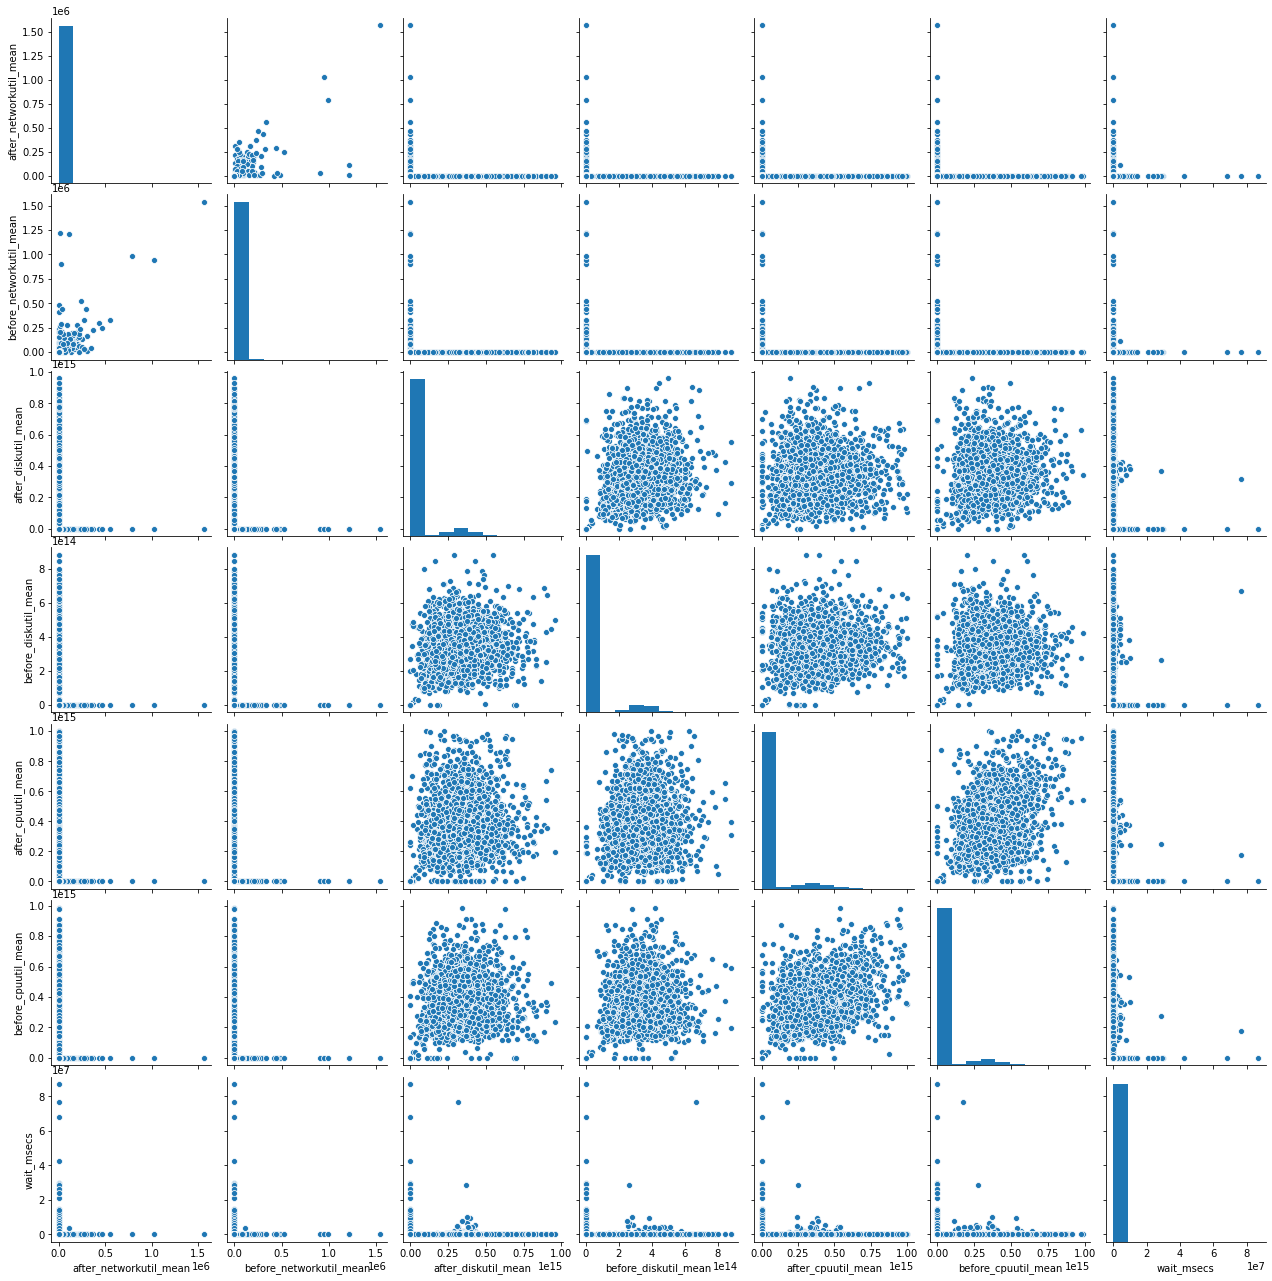

In [78]:
sns.pairplot(mean_mw)

In the pairplot, the mouse wait time has little to do with any of other variables in the dataset. CPU utility seems to have positive correlation with disk utility. 

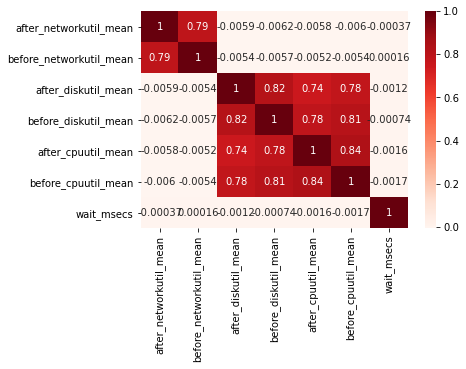

In [77]:
sns.heatmap(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'wait_msecs']].corr(), annot=True, cmap = 'Reds')

In [93]:
mousewait['wait_msecs'].value_counts()

1100      13837
1200      10630
1500       9407
1300       8984
1400       8109
          ...  
404002        1
416300        1
4837          1
3456          1
540294        1
Name: wait_msecs, Length: 24069, dtype: int64

In [23]:
# yscale wait time
mousewait['yscaled_wait'] = [math.log(x) for x in mousewait['wait_msecs']]

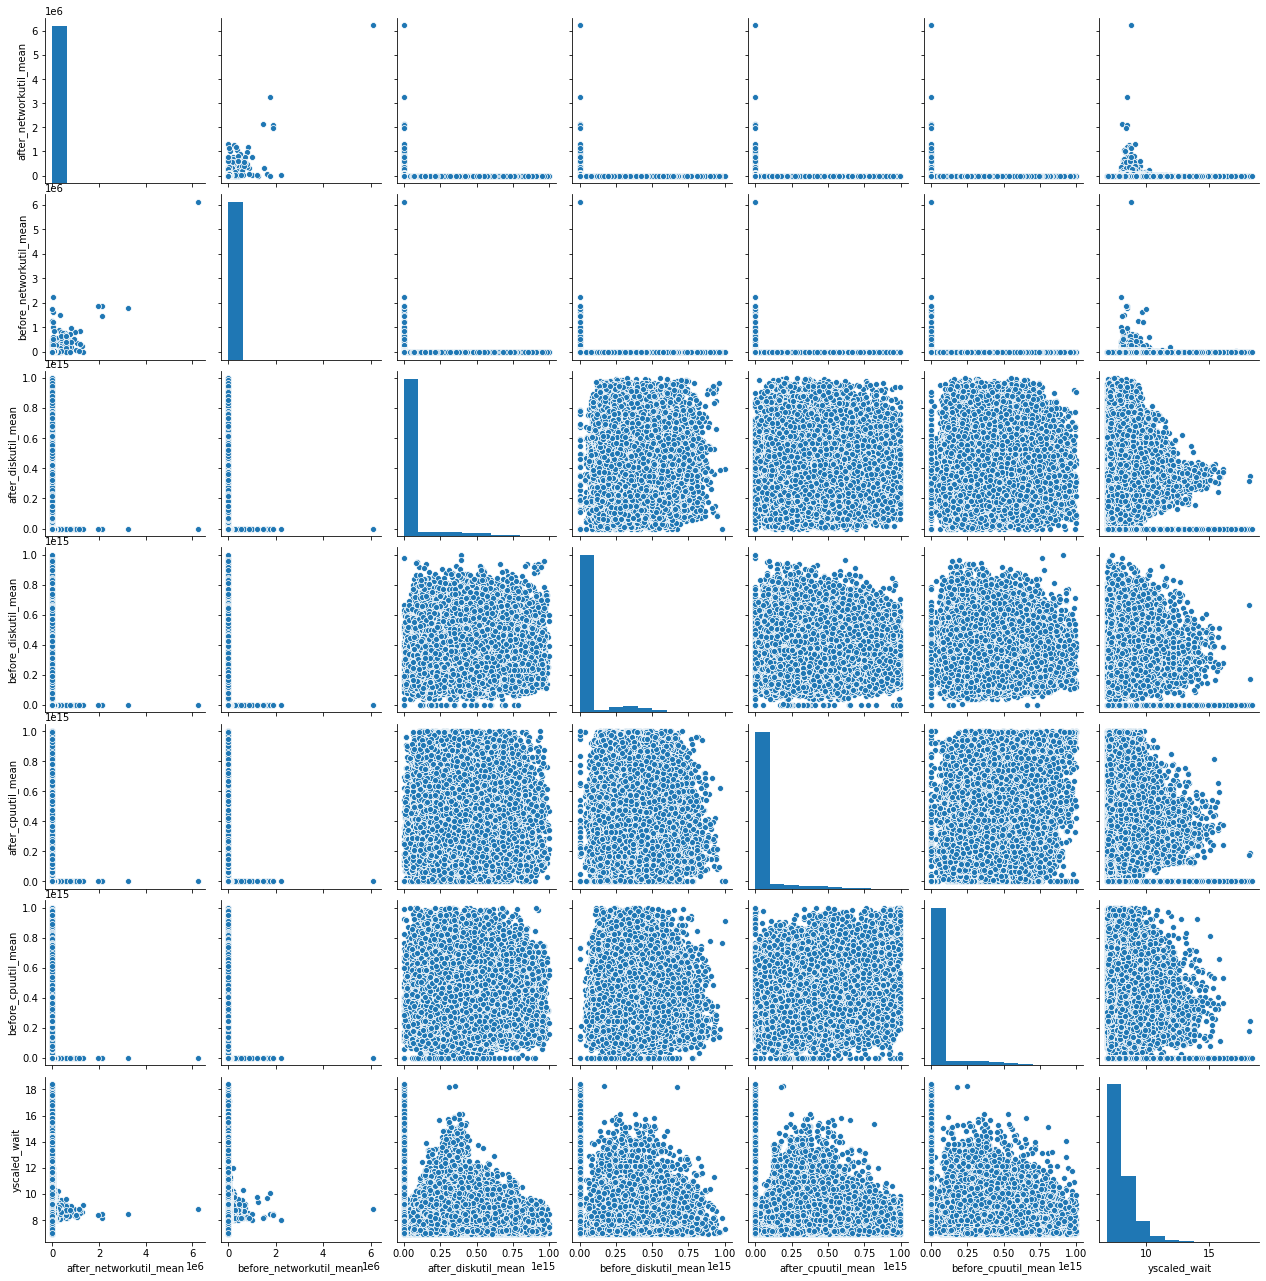

In [20]:
sns.pairplot(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'yscaled_wait']])

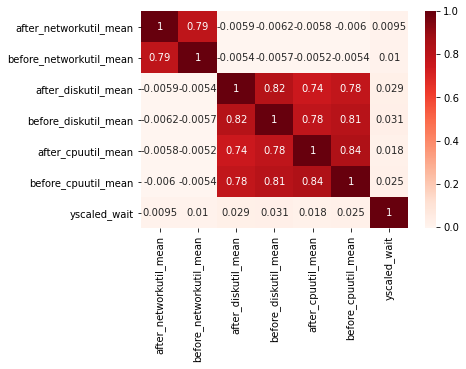

In [22]:
sns.heatmap(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'yscaled_wait']].corr(), annot=True, cmap = 'Reds')

In [35]:
# y scale both wait time and other factors
mousewait['log_after_networkutil_mean'] = np.log(mousewait['after_networkutil_mean'])
mousewait['log_before_networkutil_mean'] = np.log(mousewait['before_networkutil_mean'])
mousewait['log_after_diskutil_mean'] = np.log(mousewait['after_diskutil_mean'])
mousewait['log_before_diskutil_mean'] = np.log(mousewait['before_diskutil_mean'])
mousewait['log_after_cpuutil_mean'] = np.log(mousewait['after_cpuutil_mean'])
mousewait['log_before_cpuutil_mean'] = np.log(mousewait['before_cpuutil_mean'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
mousewait = mousewait.replace([float('-inf') ], -2)

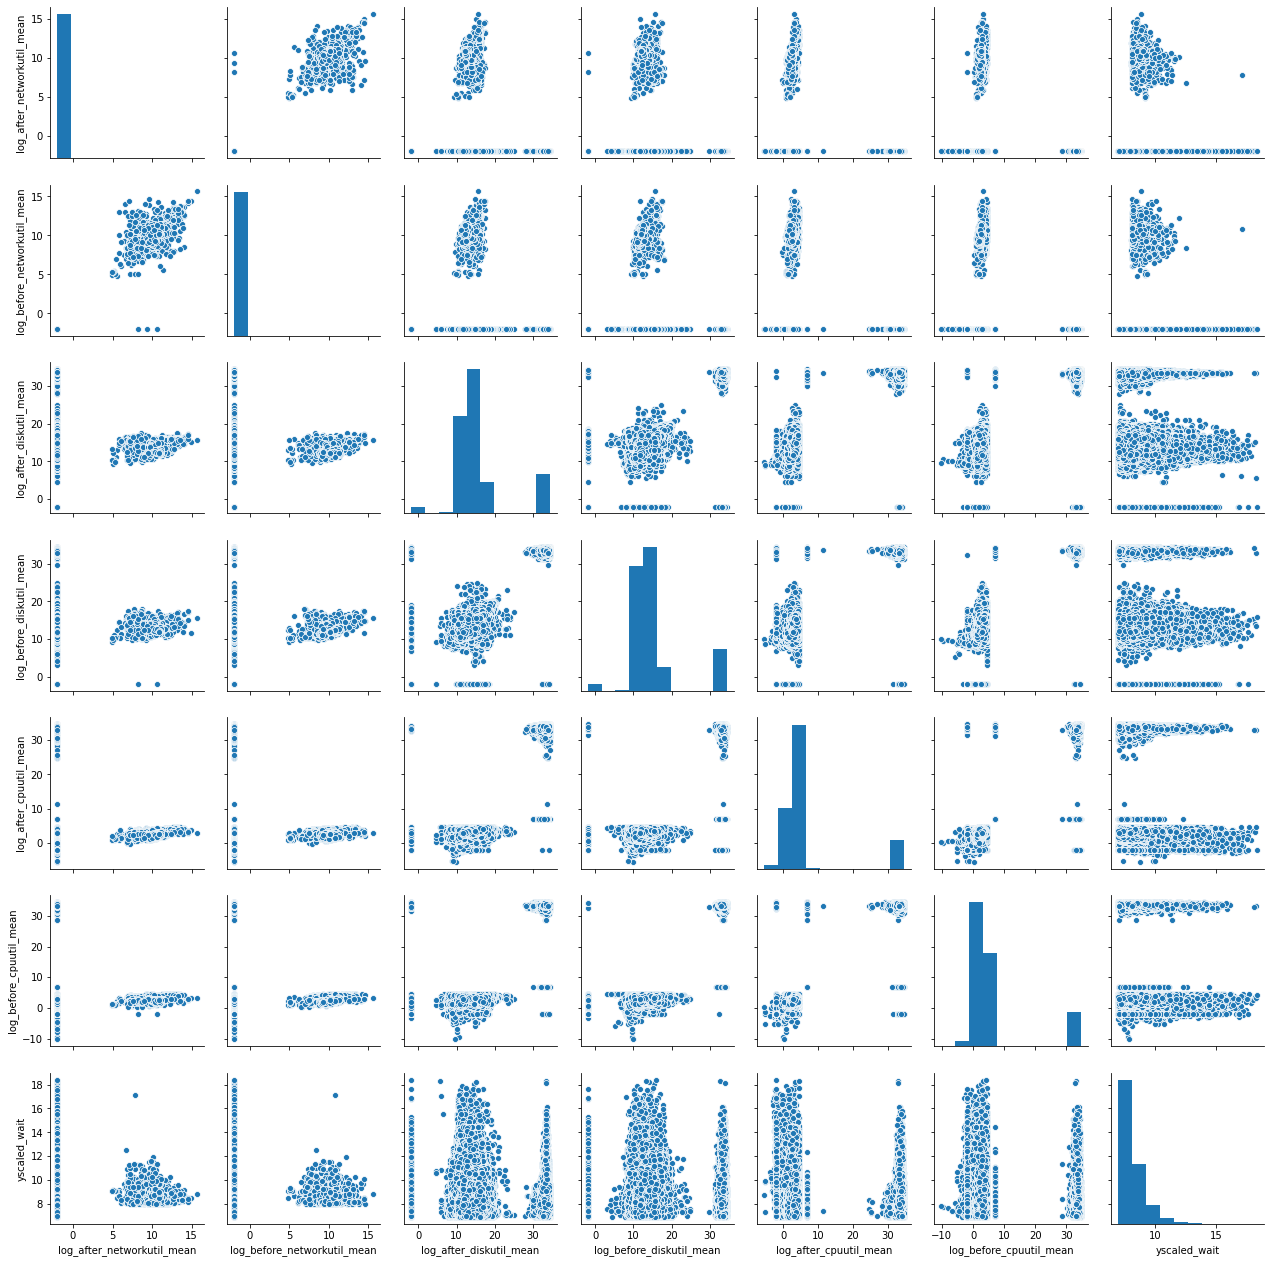

In [37]:
sns.pairplot(mousewait[['log_after_networkutil_mean', \
                                       'log_before_networkutil_mean', \
                                       'log_after_diskutil_mean', \
                                       'log_before_diskutil_mean', \
                                       'log_after_cpuutil_mean', \
                                       'log_before_cpuutil_mean', 'yscaled_wait']])

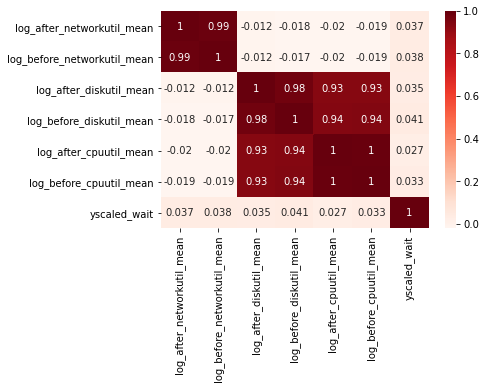

In [18]:
sns.heatmap(mousewait[['log_after_networkutil_mean', \
                                       'log_before_networkutil_mean', \
                                       'log_after_diskutil_mean', \
                                       'log_before_diskutil_mean', \
                                       'log_after_cpuutil_mean', \
                                       'log_before_cpuutil_mean', 'yscaled_wait']].corr(), annot=True, cmap = 'Reds')

In [38]:
mousewait['networkutil_diff'] = mousewait['before_networkutil_mean'] - mousewait['after_networkutil_mean']
mousewait['diskutil_diff'] = mousewait['before_diskutil_mean'] - mousewait['after_diskutil_mean']
mousewait['cpuutil_diff'] = mousewait['before_cpuutil_mean'] - mousewait['after_cpuutil_mean']

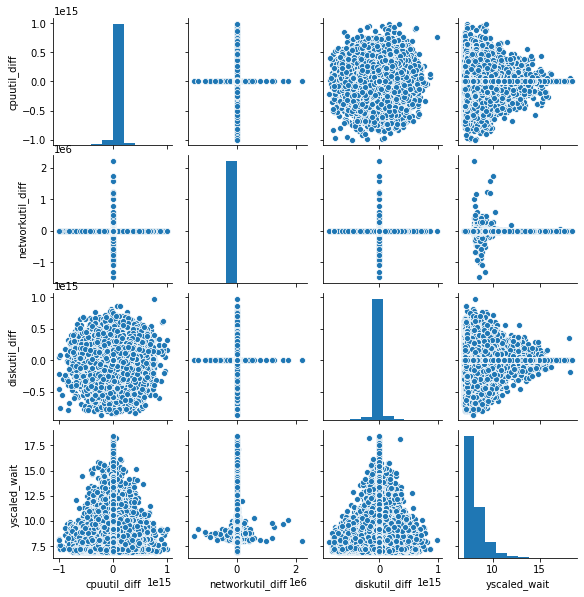

In [56]:
sns.pairplot(mousewait[['cpuutil_diff', 'networkutil_diff', 'diskutil_diff', 'yscaled_wait']], height = 2)

## System Information

In [19]:
systeminfo = dataframe('../dataset/system_sysinfo_unique_normalized.csv000.gz', '\x01')
systeminfo.head()

/opt/conda/lib/python3.7/site-packages/dask/dataframe/io/csv.py:385: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  "Setting ``blocksize=None``" % compression


,load_ts,guid,chassistype,chassistype_2in1_category,countryname,countryname_normalized,modelvendor,modelvendor_normalized,model,model_normalized,...,cpu_suffix,screensize_category,persona,processor_line,vpro_enabled,firstreportdate,lastreportdate,discretegraphics,cpu_stepping,engagement_id
0,2020-10-01 00:48:15,10351643a4ae4b2d9cbc8a90db184050,Notebook,Unknown,Brazil,Brazil,Lenovo,Lenovo,Lenovo G480,Lenovo G480,...,Core-M,14x,Web User,M-Processor,N,2020-01-12 20:31:03,2020-09-29 18:30:56,N,Intel64 Family 6 Model 42 Stepping 7,iduu
1,2020-10-01 00:48:15,4f40b2f38cd74f6ea1559cebbc924619,Notebook,Unknown,Sweden,Sweden,Asus,Asus,T300CHI,T300CHI,...,Core-Y,12x,Web User,Unknown,N,2018-11-15 17:24:52,2020-09-28 12:49:29,N,Intel64 Family 6 Model 61 Stepping 4,iduu
2,2020-10-01 00:48:15,04b81eb4d661410ebff356f27fc544ed,Desktop,Unknown,Viet Nam,Viet Nam,System manufacturer,System manufacturer,System Product Name,System Product Name,...,Other,23x,Office/Productivity,Unknown,Y,2020-05-09 12:24:37,2020-09-29 08:54:35,Y,Intel64 Family 6 Model 158 Stepping 12,intel.com
3,2020-10-01 00:48:15,afd55a587fe14fc1904d572b3230dd54,Notebook,Unknown,Mexico,Mexico,HP,HP,HP ProBook 640 G2,HP ProBook 640 G2,...,Core-U,14x,Office/Productivity,U-Processor,N,2019-10-22 13:56:27,2020-09-28 08:41:47,N,Intel64 Family 6 Model 78 Stepping 3,intel.com
4,2020-10-01 00:48:15,4b3d6747c5f541949f4c1bd127b00bd9,Notebook,Unknown,Romania,Romania,Acer,Acer,Nitro AN515-52,Nitro AN515-52,...,Core-H,15x,Web User,H-Processor,N,2020-04-01 17:37:46,2020-04-23 19:34:16,Y,Intel64 Family 6 Model 158 Stepping 10,intel.com


In [20]:
systeminfo.columns

Index(['load_ts', 'guid', 'chassistype', 'chassistype_2in1_category',
       'countryname', 'countryname_normalized', 'modelvendor',
       'modelvendor_normalized', 'model', 'model_normalized', 'ram', 'os',
       '#ofcores', 'age_category', 'graphicsmanuf', 'gfxcard',
       'graphicscardclass', 'processornumber', 'cpuvendor', 'cpuname',
       'cpucode', 'cpu_family', 'cpu_suffix', 'screensize_category', 'persona',
       'processor_line', 'vpro_enabled', 'firstreportdate', 'lastreportdate',
       'discretegraphics', 'cpu_stepping', 'engagement_id'],
      dtype='object')

In [28]:
systeminfo_df = systeminfo[['guid', 'countryname_normalized', 'modelvendor_normalized', \
                            'model_normalized', 'ram', 'os', '#ofcores', 'age_category', \
                           'graphicscardclass', 'cpu_family', 'screensize_category', \
                           'persona']]

In [29]:
systeminfo_df.head()

,guid,countryname_normalized,modelvendor_normalized,model_normalized,ram,os,#ofcores,age_category,graphicscardclass,cpu_family,screensize_category,persona
0,10351643a4ae4b2d9cbc8a90db184050,Brazil,Lenovo,Lenovo G480,12.0,Win10,2.0,6+ years,Low-End Graphics Cards,Core i3,14x,Web User
1,4f40b2f38cd74f6ea1559cebbc924619,Sweden,Asus,T300CHI,8.0,Win10,2.0,5-6 years,Low-End Graphics Cards,Core M,12x,Web User
2,04b81eb4d661410ebff356f27fc544ed,Viet Nam,System manufacturer,System Product Name,8.0,Win10,8.0,0-1 year,Low-Midrange Graphics Cards,Core i7,23x,Office/Productivity
3,afd55a587fe14fc1904d572b3230dd54,Mexico,HP,HP ProBook 640 G2,8.0,Win10,2.0,3-4 years,Low-Midrange Graphics Cards,Core i5,14x,Office/Productivity
4,4b3d6747c5f541949f4c1bd127b00bd9,Romania,Acer,Nitro AN515-52,16.0,Win10,4.0,1-2 years,Mid-Range Graphics Cards,Core i5,15x,Web User


Text(0, 0.5, 'freq')

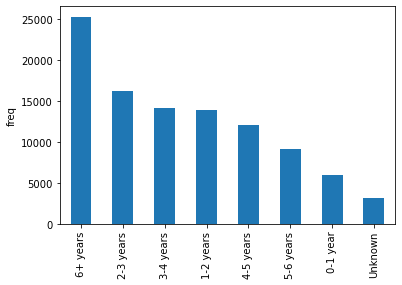

In [36]:
systeminfo_df.age_category.value_counts().compute().plot(kind = 'bar')
plt.ylabel("freq")

In [39]:
# 10 most model vendors
systeminfo_df['modelvendor_normalized'].value_counts().compute()[:10]

HP                     15531
Dell                   14806
Lenovo                 11879
Asus                   10686
System manufacturer     6491
Acer                    6175
MSI                     5352
Gigabyte                5172
Unknown                 3484
Intel                   3326
Name: modelvendor_normalized, dtype: int64

In [40]:
# 10 most countries
systeminfo_df['countryname_normalized'].value_counts().compute()[:10]

United States of America                                21931
Other                                                   10984
Germany                                                  6363
Japan                                                    5058
United Kingdom of Great Britain and Northern Ireland     4533
Brazil                                                   4463
Canada                                                   2996
Korea, Republic of                                       2852
Italy                                                    2746
India                                                    2579
Name: countryname_normalized, dtype: int64

In [50]:
# pivot tables
systeminfo_df = systeminfo_df.categorize(columns=['persona'])

pt = dd.pivot_table(df = systeminfo_df, index='age_category', \
                    columns='persona',\
                    values='#ofcores').compute()
pt

persona,Web User,Office/Productivity,Casual Gamer,Entertainment,Unknown,Communication,Casual User,Gamer,Content Creator/IT,Win Store App User,File & Network Sharer
age_category,,,,,,,,,,,
0-1 year,4.791973,4.692521,5.472103,5.016760,6.000000,4.650794,5.252199,5.561538,5.377358,4.592308,4.612613
1-2 years,4.261467,4.139360,4.779910,4.207729,3.555556,4.223590,4.397398,4.887833,4.719626,4.115774,4.157303
2-3 years,2.807663,2.712144,3.237953,2.859589,2.410256,2.593810,2.973376,3.200624,3.092612,2.654867,2.711688
3-4 years,3.192061,2.997319,3.468338,3.248485,3.087719,2.927536,3.285630,3.495562,3.473094,3.123967,3.049505
4-5 years,2.590247,2.434198,3.006012,2.648649,2.702703,2.370552,2.696246,3.067227,2.630027,2.519481,2.421429
5-6 years,2.906144,2.737216,3.210657,3.077128,2.838235,2.911308,3.030233,3.212620,3.235294,2.985748,3.023697
6+ years,2.850937,2.745234,3.157412,2.835125,2.604712,2.952473,2.962090,3.081023,3.093333,2.803077,2.979866
Unknown,2.367965,2.311475,2.492958,2.410256,2.170213,2.578947,2.610169,2.568627,2.652174,2.514019,2.739130


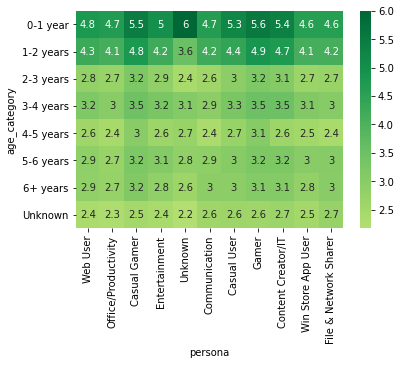

In [51]:
sns.heatmap(pt, annot=True, cmap = 'RdYlGn', center=0.117)

The more the age are the computers, the less the #of cores. Gamer, casual gamer, content creator/ IT, entertainment tend to use larger #of cores.

## Foreground

In [72]:
foreground = dataframe2('../dataset/frgnd_v2.csv000.gz','\x01')
foreground.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,dt,pid,proc_name,proc_package,captioned,display_name,duration,avg_fract_desktop,window_mode,non_responsive
0,2020-10-09 06:46:14,20201008-200236,2020100821-i-0728cf8ab79db9e58-IYRBHzHfuKcySue...,V8_2_FRGND_20201009000117.V8,00080eb560cc4143828634868bcdaa53,2020-10-07 21:00:55,2020-10-08 21:01:39,2020-10-08 00:00:55,2020-10-09 00:01:39,2020-10-08 00:08:03.784,2020-10-08,0,dummy_process,NaN,NaN,Unknown,7329305.0,0.0,NaN,f
1,2020-10-09 06:46:14,20201008-200236,2020100821-i-0728cf8ab79db9e58-IYRBHzHfuKcySue...,V8_2_FRGND_20201009000117.V8,00080eb560cc4143828634868bcdaa53,2020-10-07 21:00:55,2020-10-08 21:01:39,2020-10-08 00:00:55,2020-10-09 00:01:39,2020-10-08 02:10:13.089,2020-10-08,0,dummy_process,NaN,NaN,Unknown,71605407.0,0.0,NaN,f
2,2020-10-10 06:09:31,20201009-200236,2020100921-i-04a9a906e1cd5620c-NHEGJF87ldykxWZ...,V8_2_FRGND_20201010000414.V8,00080eb560cc4143828634868bcdaa53,2020-10-08 21:01:33,2020-10-09 21:04:28,2020-10-09 00:01:33,2020-10-10 00:04:28,2020-10-09 00:44:02.17,2020-10-09,0,dummy_process,NaN,NaN,Unknown,53517623.0,0.0,NaN,f
3,2020-10-10 06:09:31,20201009-200236,2020100921-i-04a9a906e1cd5620c-NHEGJF87ldykxWZ...,V8_2_FRGND_20201010000414.V8,00080eb560cc4143828634868bcdaa53,2020-10-08 21:01:33,2020-10-09 21:04:28,2020-10-09 00:01:33,2020-10-10 00:04:28,2020-10-09 15:35:59.793,2020-10-09,0,dummy_process,NaN,NaN,Unknown,12262704.0,0.0,NaN,f
4,2020-10-10 06:09:31,20201009-200236,2020100921-i-04a9a906e1cd5620c-NHEGJF87ldykxWZ...,V8_2_FRGND_20201010000414.V8,00080eb560cc4143828634868bcdaa53,2020-10-08 21:01:33,2020-10-09 21:04:28,2020-10-09 00:01:33,2020-10-10 00:04:28,2020-10-09 19:00:22.497,2020-10-09,0,dummy_process,NaN,NaN,Unknown,12905351.0,0.0,NaN,f


In [73]:
foreground.shape

(3000000, 20)

In [12]:
foreground.proc_name.value_counts()

explorer.exe                79353
chrome.exe                  65893
dummy_process               51246
restricted process          31495
firefox.exe                 23875
                            ...  
fixmapi.exe                     1
iastoricon.exe                  1
itunes64setup1210102.exe        1
idtngui.exe                     1
systray.exe                     1
Name: proc_name, Length: 860, dtype: int64

From the data dictionary, I picked: guid(unique identifier of the client), non_responsive, proc_name(Name of the foreground application Ex: excel.exe), duration(duration of the time app in foreground)

In [64]:
foreground_df = foreground[['batch_id', 'guid', 'proc_name', 'non_responsive', 'duration']]
foreground_df.head()

,batch_id,guid,proc_name,non_responsive,duration
0,20201008-200236,00080eb560cc4143828634868bcdaa53,dummy_process,f,7329305.0
1,20201008-200236,00080eb560cc4143828634868bcdaa53,dummy_process,f,71605407.0
2,20201009-200236,00080eb560cc4143828634868bcdaa53,dummy_process,f,53517623.0
3,20201009-200236,00080eb560cc4143828634868bcdaa53,dummy_process,f,12262704.0
4,20201009-200236,00080eb560cc4143828634868bcdaa53,dummy_process,f,12905351.0


In [14]:
foreground.non_responsive.value_counts()

f    495942
t      4058
Name: non_responsive, dtype: int64

In [15]:
foreground['non_responsive'] = foreground['non_responsive'].replace(['f', 't'], [0, 1])

In [17]:
foreground.groupby('non_responsive')['duration'].agg(['min', 'max', 'mean', 'median'])
# Duration of the time app is in foreground

,min,max,mean,median
non_responsive,,,,
0,0.0,2.139007e+09,550522.774248,3595.0
1,62.0,8.654302e+07,230098.228931,2001.0


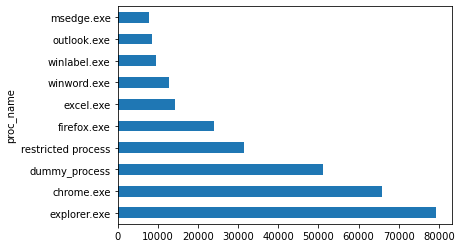

In [101]:
#non-responsive frequency top 10
foreground.groupby('proc_name')['non_responsive'].count().sort_values(ascending = False)[:10].plot.barh()

Taking the frequency of the processes into consideration, we create a new column to account for the proportion of sum of non_responsive frequency and process prequency.

In [110]:
proc_vc = foreground.proc_name.value_counts().to_frame()
proc_response = foreground.groupby('proc_name')[['non_responsive']].sum()

merged = pd.merge(proc_vc, proc_response, left_index=True, right_index=True)
merged['proportion'] = merged['non_responsive']/merged['proc_name']
merged.sort_values(by = 'proportion', ascending = False)[:10]

,proc_name,non_responsive,proportion
yuzu.exe,1,1,1.000000
teamssetupx64_s_8d8972829670706-7-0_.exe,1,1,1.000000
illustrator.exe,20,15,0.750000
valorant-win64-shipping.exe,74,35,0.472973
flow.exe,30,9,0.300000
splwow64.exe,44,13,0.295455
tslgame.exe,52,14,0.269231
blacklist_dx11_game.exe,15,4,0.266667
bioshock2hd.exe,4,1,0.250000
starwarsjedifallenorder.exe,13,3,0.230769


In [112]:
proc_vc.index[:5]

Index(['explorer.exe', 'chrome.exe', 'dummy_process', 'restricted process',
       'firefox.exe'],
      dtype='object')

In [114]:
merged.describe()

,proc_name,non_responsive,proportion
count,860.000000,860.000000,860.000000
mean,581.391860,4.718605,0.009216
std,4275.407104,100.053594,0.063303
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000
75%,74.000000,0.000000,0.000000
max,79353.000000,2914.000000,1.000000


In [113]:
merged.loc[proc_vc.index[:5]]

,proc_name,non_responsive,proportion
explorer.exe,79353,19,0.000239
chrome.exe,65893,49,0.000744
dummy_process,51246,0,0.000000
restricted process,31495,2914,0.092523
firefox.exe,23875,12,0.000503


In [74]:
#Combining mousewait and foreground
mousewait['key'] = mousewait['guid'] + mousewait['batch_id']
mousewait_key = set(mousewait['key'])
len(mousewait_key)

259704

In [75]:
foreground['key'] = foreground['guid'] + foreground['batch_id']
foreground_key = set(foreground['key'])
len(foreground_key)

9762

In [76]:
commonkey = list(set(mousewait_key & foreground_key))
len(commonkey)

0

## Hw metric histo
- what is it about?

In [163]:
hwmetric = dataframe('hw_metric_histo.csv000.gz')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  


In [165]:
hwmetric.head()

,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,dt,name,...,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,metric_max_val
0,20200317-210516,2020031719-i-040171543e1bfef37-FMMTabtq3rBTHgI...,V8HWMETRICHISTO_20200317142808.V8,0009a89f8ffa497bb8d27f9df4f44f8c,2020-03-16 17:22:56,2020-03-17 19:28:28,2020-03-16 12:22:56,2020-03-17 14:28:28,2020-03-16,HW:::GT_C0_RESIDENCY::,...,1701,217,112,57,56,27,9,6,123,100.000
1,20200317-210516,2020031719-i-040171543e1bfef37-FMMTabtq3rBTHgI...,V8HWMETRICHISTO_20200317142808.V8,0009a89f8ffa497bb8d27f9df4f44f8c,2020-03-16 17:22:56,2020-03-17 19:28:28,2020-03-16 12:22:56,2020-03-17 14:28:28,2020-03-16,HW::CORE:C0:PERCENT:,...,1157,965,1351,227,253,348,296,52,1,91.295
2,20200317-210516,2020031719-i-040171543e1bfef37-FMMTabtq3rBTHgI...,V8HWMETRICHISTO_20200317142808.V8,0009a89f8ffa497bb8d27f9df4f44f8c,2020-03-16 17:22:56,2020-03-17 19:28:28,2020-03-16 12:22:56,2020-03-17 14:28:28,2020-03-16,HW::CORE:C0:PERCENT:,...,1169,1431,648,501,372,308,166,24,4,98.921
3,20200317-210516,2020031719-i-040171543e1bfef37-FMMTabtq3rBTHgI...,V8HWMETRICHISTO_20200317142808.V8,0009a89f8ffa497bb8d27f9df4f44f8c,2020-03-16 17:22:56,2020-03-17 19:28:28,2020-03-16 12:22:56,2020-03-17 14:28:28,2020-03-16,HW::CORE:C0:PERCENT:,...,1421,1247,587,423,250,157,46,5,1,90.421
4,20200317-210516,2020031719-i-040171543e1bfef37-FMMTabtq3rBTHgI...,V8HWMETRICHISTO_20200317142808.V8,0009a89f8ffa497bb8d27f9df4f44f8c,2020-03-16 17:22:56,2020-03-17 19:28:28,2020-03-16 12:22:56,2020-03-17 14:28:28,2020-03-16,HW::CORE:C0:PERCENT:,...,1952,670,644,285,169,70,19,5,0,88.480


In [164]:
hwmetric2 = dataframe('hw_metric_histo.csv001.gz')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  


## mousewait+systeminfo+foreground

In [176]:
mousewait_df.merge(systeminfo_df, on = 'guid')

,batch_id,guid,wait_msecs,countryname_normalized,modelvendor_normalized,model_normalized,ram,os,#ofcores,age_category,graphicscardclass,cpucode,cpu_family,screensize_category,persona
